In [17]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Task distribution

In [18]:
with open("data/Tree2_v3.json", "r") as f_real:
    real_data = [json.loads(line) for line in f_real]
for entry in real_data:
    entry["source"] = "real"

# Step 2: Load simulated data
with open("results/Tree2/v3/simulated_v3_model1.json", "r") as f_sim:
    model1_data = [json.loads(line) for line in f_sim]
for entry in model1_data:
    entry["source"] = "model1"

with open("results/Tree2/v3/simulated_v3_model2.json", "r") as f_sim:
    model2_data = [json.loads(line) for line in f_sim]
for entry in model2_data:
    entry["source"] = "model2"

with open("results/Tree2/v3/simulated_v3_model3.json", "r") as f_sim:
    model3_data = [json.loads(line) for line in f_sim]
for entry in model3_data:
    entry["source"] = "model3"

with open("results/Tree2/v3/simulated_v3_model4.json", "r") as f_sim:
    model4_data = [json.loads(line) for line in f_sim]
for entry in model4_data:
    entry["source"] = "model4"

with open("results/Tree2/v3/simulated_v3_model5.json", "r") as f_sim:
    model5_data = [json.loads(line) for line in f_sim]
for entry in model5_data:
    entry["source"] = "model5"

# with open("data/v3/simulated_v3_model6.json", "r") as f_sim:
#     model6_data = [json.loads(line) for line in f_sim]
# for entry in model6_data:
#     entry["source"] = "model6"

# with open("data/v3/simulated_v3_model7.json", "r") as f_sim:
#     model7_data = [json.loads(line) for line in f_sim]
# for entry in model7_data:
#     entry["source"] = "model7"

# with open("data/v3/simulated_v3_model8.json", "r") as f_sim:
#     model8_data = [json.loads(line) for line in f_sim]
# for entry in model8_data:
#     entry["source"] = "model8"

# with open("data/v3/simulated_v3_model9.json", "r") as f_sim:
#     model9_data = [json.loads(line) for line in f_sim]
# for entry in model9_data:
#     entry["source"] = "model9"

# with open("data/v3/simulated_v3_model10.json", "r") as f_sim:
#     model10_data = [json.loads(line) for line in f_sim]
# for entry in model10_data:
#     entry["source"] = "model10"

# with open("data/v3/simulated_v3_model14.json", "r") as f_sim:
#     model14_data = [json.loads(line) for line in f_sim]
# for entry in model14_data:
#     entry["source"] = "model14"




# Step 3: Combine and save
# df = real_data + model1_data + model2_data + model3_data + model4_data + \
#     model5_data + model6_data + model7_data + model8_data + model9_data + model10_data + model14_data

df = real_data + model1_data + model2_data + model3_data + model4_data + model5_data

df = pd.DataFrame(df)
df

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,source,model,simulation_id,timeout
0,wdf61453,"[-4, -5, 0, 3]","[-4, -1]","[0, -1, 1, 4]",2,4,2667,2400,5067,6.0,6,3.0,real,NaN,NaN,NaN
1,wdf61453,"[1, -1, -3, -2]","[-2, 0]","[3, 1, -3, -2]",2,4,1883,2348,4231,3.0,3,1.0,real,NaN,NaN,NaN
2,wdf61453,"[3, 8, -5, -4]","[4, -3]","[-1, 4, -2, -1]",1,2,1227,1736,2963,10.0,10,5.0,real,NaN,NaN,NaN
3,wdf61453,"[0, 2, 7, 1]","[0, 3]","[0, 2, 4, -2]",2,3,1850,1363,3213,6.0,6,6.0,real,NaN,NaN,NaN
4,wdf61453,"[4, 8, -7, -6]","[4, -3]","[0, 4, -4, -3]",1,2,1724,1459,3183,11.0,11,4.0,real,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27529,w2424d8d,"[-1, 6, -3, -8]","[3, -4]","[-4, 3, 1, -4]",1,2,1848,1391,3239,10.0,10,7.0,model5,model5,1.0,False
27530,w2424d8d,"[-3, -4, -2, -5]","[-3, -3]","[0, -1, 1, -2]",1,1,3717,1327,5044,2.0,2,1.0,model5,model5,1.0,False
27531,w2424d8d,"[7, 4, -7, -6]","[3, -3]","[4, 1, -4, -3]",1,1,3462,2314,5776,10.0,10,3.0,model5,model5,1.0,False
27532,w2424d8d,"[1, 2, 0, 3]","[3, -1]","[-2, -1, 1, 4]",2,4,6138,1327,7465,2.0,2,3.0,model5,model5,1.0,False


In [19]:
def subtree_vals(path_value, choice1):

    if choice1 == 1:
        return path_value[0:2]
    else:
        return path_value[2:4]

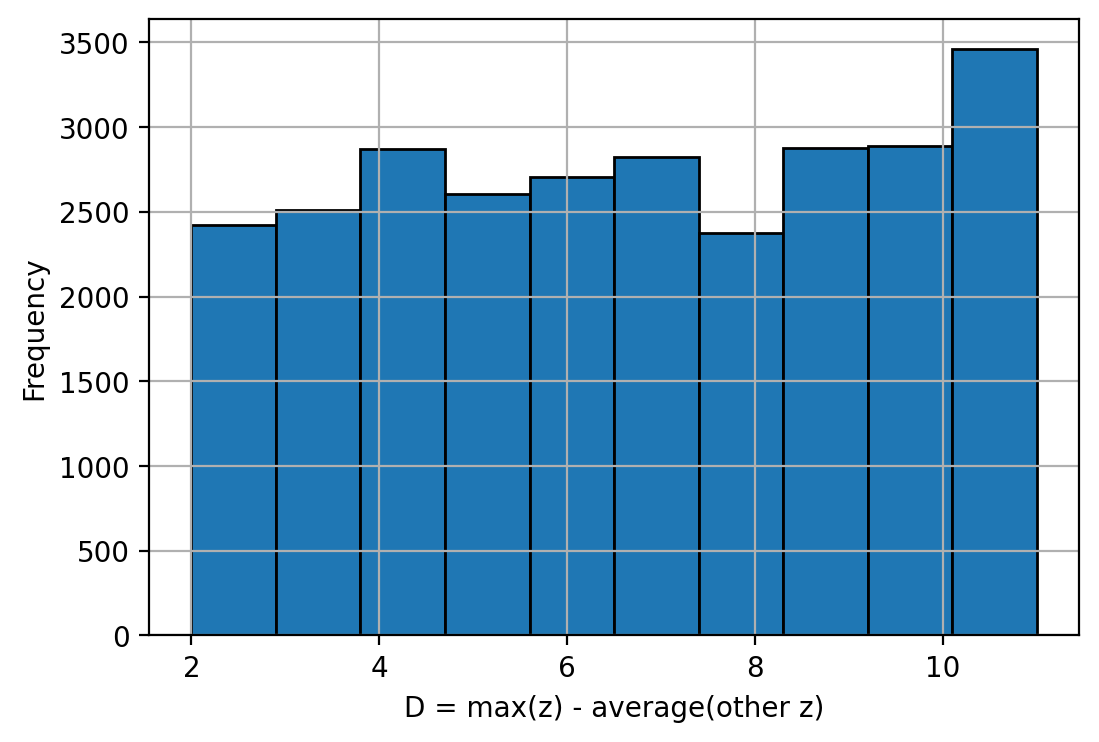

In [20]:
plt.figure(figsize=(6, 4))
plt.hist(df['difficulty'], edgecolor='black', density=False)
plt.xlabel("D = max(z) - average(other z)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [21]:
# first stage accuracy

df['best_path_idx'] = df['rewards'].apply(lambda v: int(np.argmax(v)))
df['correct1'] = df.apply(
    lambda r: (r['best_path_idx'] < 2 and r['choice1'] == 1)
              or (r['best_path_idx'] >= 2 and r['choice1'] == 2),
    axis=1
)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,source,model,simulation_id,timeout,best_path_idx,correct1
0,wdf61453,"[-4, -5, 0, 3]","[-4, -1]","[0, -1, 1, 4]",2,4,2667,2400,5067,6.0,6,3.0,real,NaN,NaN,NaN,3,True
1,wdf61453,"[1, -1, -3, -2]","[-2, 0]","[3, 1, -3, -2]",2,4,1883,2348,4231,3.0,3,1.0,real,NaN,NaN,NaN,0,False
2,wdf61453,"[3, 8, -5, -4]","[4, -3]","[-1, 4, -2, -1]",1,2,1227,1736,2963,10.0,10,5.0,real,NaN,NaN,NaN,1,True
3,wdf61453,"[0, 2, 7, 1]","[0, 3]","[0, 2, 4, -2]",2,3,1850,1363,3213,6.0,6,6.0,real,NaN,NaN,NaN,2,True
4,wdf61453,"[4, 8, -7, -6]","[4, -3]","[0, 4, -4, -3]",1,2,1724,1459,3183,11.0,11,4.0,real,NaN,NaN,NaN,1,True


In [22]:
# 5. Second‐stage correctness:
#    “Selected the higher‐rated item in that subtree”
df['correct2'] = df.apply(
    lambda r: (
        r['value2'][r['choice2'] - 1]
        == max(subtree_vals(r['value2'], r['choice1']))
    ),
    axis=1
)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,source,model,simulation_id,timeout,best_path_idx,correct1,correct2
0,wdf61453,"[-4, -5, 0, 3]","[-4, -1]","[0, -1, 1, 4]",2,4,2667,2400,5067,6.0,6,3.0,real,NaN,NaN,NaN,3,True,True
1,wdf61453,"[1, -1, -3, -2]","[-2, 0]","[3, 1, -3, -2]",2,4,1883,2348,4231,3.0,3,1.0,real,NaN,NaN,NaN,0,False,True
2,wdf61453,"[3, 8, -5, -4]","[4, -3]","[-1, 4, -2, -1]",1,2,1227,1736,2963,10.0,10,5.0,real,NaN,NaN,NaN,1,True,True
3,wdf61453,"[0, 2, 7, 1]","[0, 3]","[0, 2, 4, -2]",2,3,1850,1363,3213,6.0,6,6.0,real,NaN,NaN,NaN,2,True,True
4,wdf61453,"[4, 8, -7, -6]","[4, -3]","[0, 4, -4, -3]",1,2,1724,1459,3183,11.0,11,4.0,real,NaN,NaN,NaN,1,True,True


In [23]:
# 6. Overall correctness
df['correct_all'] = df['correct1'] & df['correct2']
df.tail()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,source,model,simulation_id,timeout,best_path_idx,correct1,correct2,correct_all
27529,w2424d8d,"[-1, 6, -3, -8]","[3, -4]","[-4, 3, 1, -4]",1,2,1848,1391,3239,10.0,10,7.0,model5,model5,1.0,False,1,True,True,True
27530,w2424d8d,"[-3, -4, -2, -5]","[-3, -3]","[0, -1, 1, -2]",1,1,3717,1327,5044,2.0,2,1.0,model5,model5,1.0,False,2,False,True,False
27531,w2424d8d,"[7, 4, -7, -6]","[3, -3]","[4, 1, -4, -3]",1,1,3462,2314,5776,10.0,10,3.0,model5,model5,1.0,False,0,True,True,True
27532,w2424d8d,"[1, 2, 0, 3]","[3, -1]","[-2, -1, 1, 4]",2,4,6138,1327,7465,2.0,2,3.0,model5,model5,1.0,False,3,True,True,True
27533,w2424d8d,"[5, -1, -5, 0]","[1, -3]","[4, -2, -2, 3]",1,1,2081,1327,3408,7.0,7,6.0,model5,model5,1.0,False,0,True,True,True


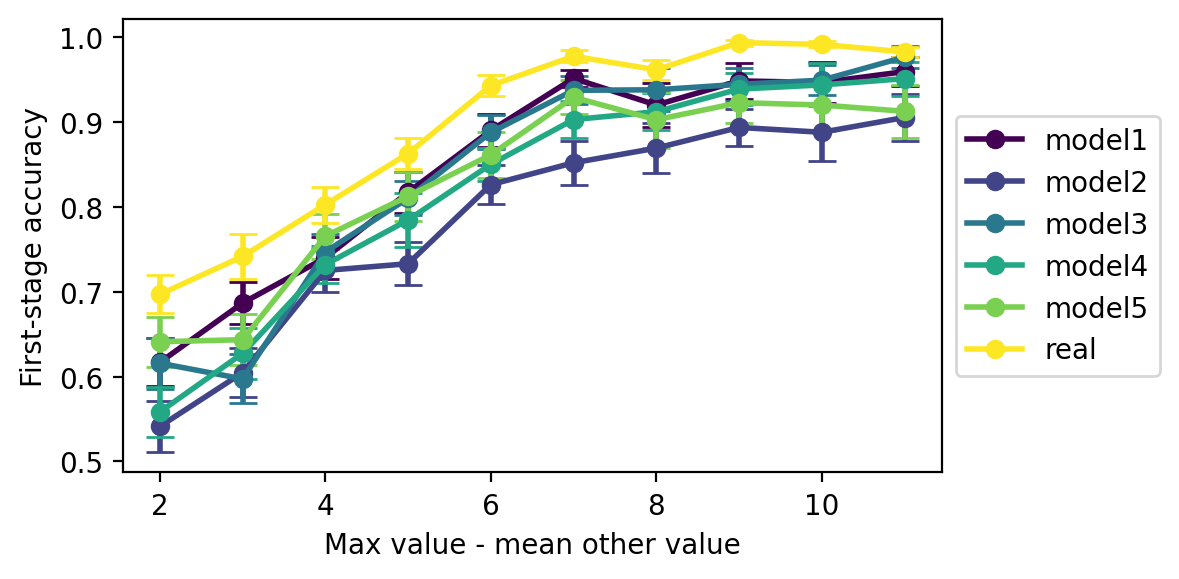

In [37]:
per1 = (
    df.groupby(['source','wid','diff1'])['correct1']
      .mean()
      .reset_index(name='accuracy1')
)

# 2. Compute group‐level mean and SEM
stats = (
    per1.groupby(['source','diff1'])['accuracy1']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. 创建 colormap
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. 画图
fig, ax = plt.subplots(figsize=(6, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5, label=str(source), color=color)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('First-stage accuracy')

legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o', label=str(source),
           linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

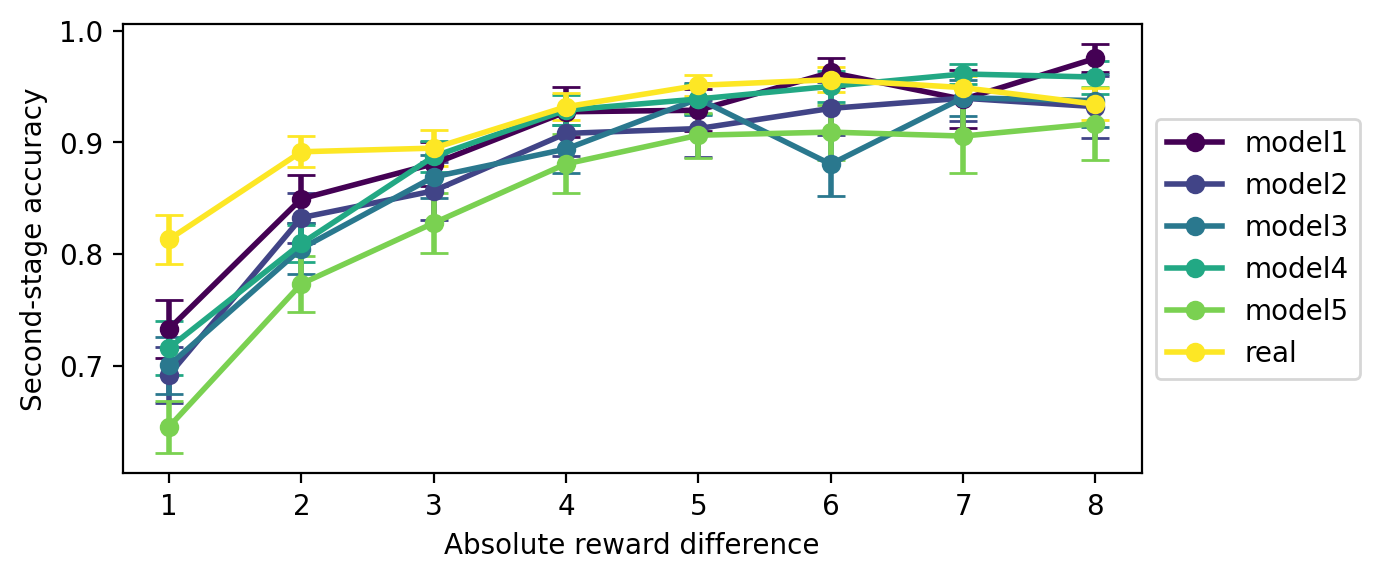

In [25]:
# 1. 每个被试的 second-stage accuracy
per2 = (
    df.groupby(['source', 'wid', 'diff2'])['correct2']
      .mean()
      .reset_index(name='accuracy2')
)

# 2. group-level mean, std, sem
stats = (
    per2.groupby(['source', 'diff2'])['accuracy2']
         .agg(['mean', 'std', 'count'])
         .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. colormap setup
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff2'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5, label=str(source), color=color)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Second-stage accuracy')

# 5. custom legend with color proxy
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

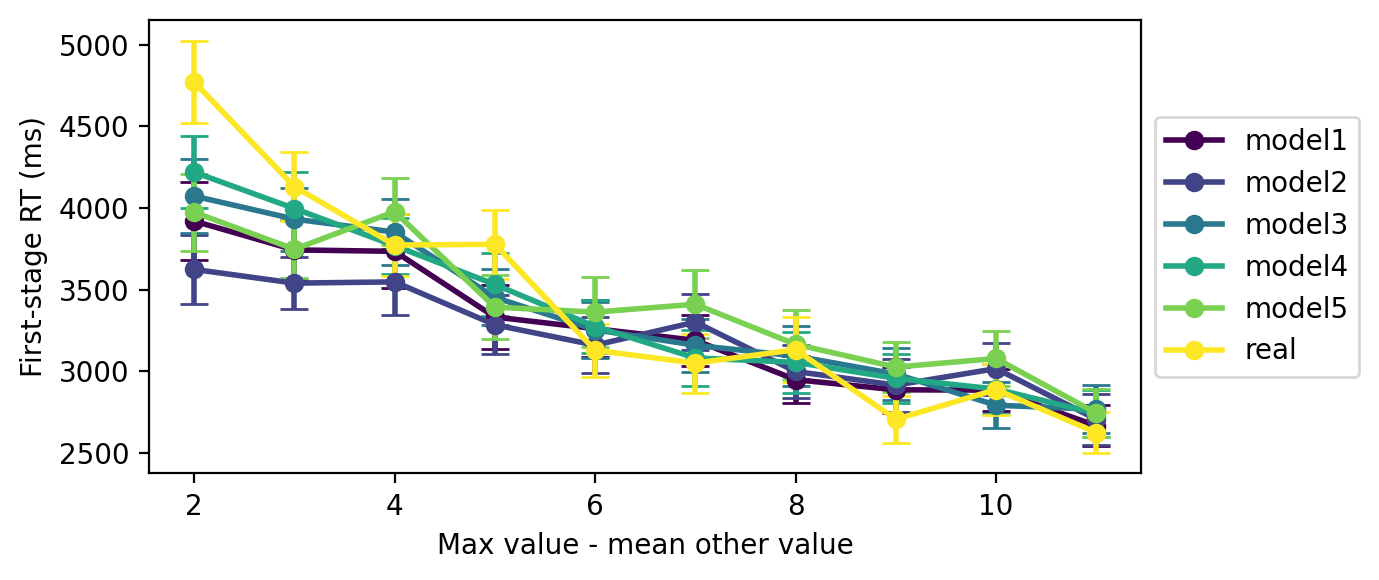

In [26]:
# 1. Compute mean RT per subject per diff1 (correct trials only)
rt1 = (
    df[df['correct1']]
      .groupby(['source', 'wid', 'diff1'])['rt1']
      .mean()
      .reset_index(name='mean_rt1')
)

# 2. Group-level stats
stats = (
    rt1.groupby(['source', 'diff1'])['mean_rt1']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Setup colormap (modern API, no warning)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('First-stage RT (ms)')

# 5. Custom legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

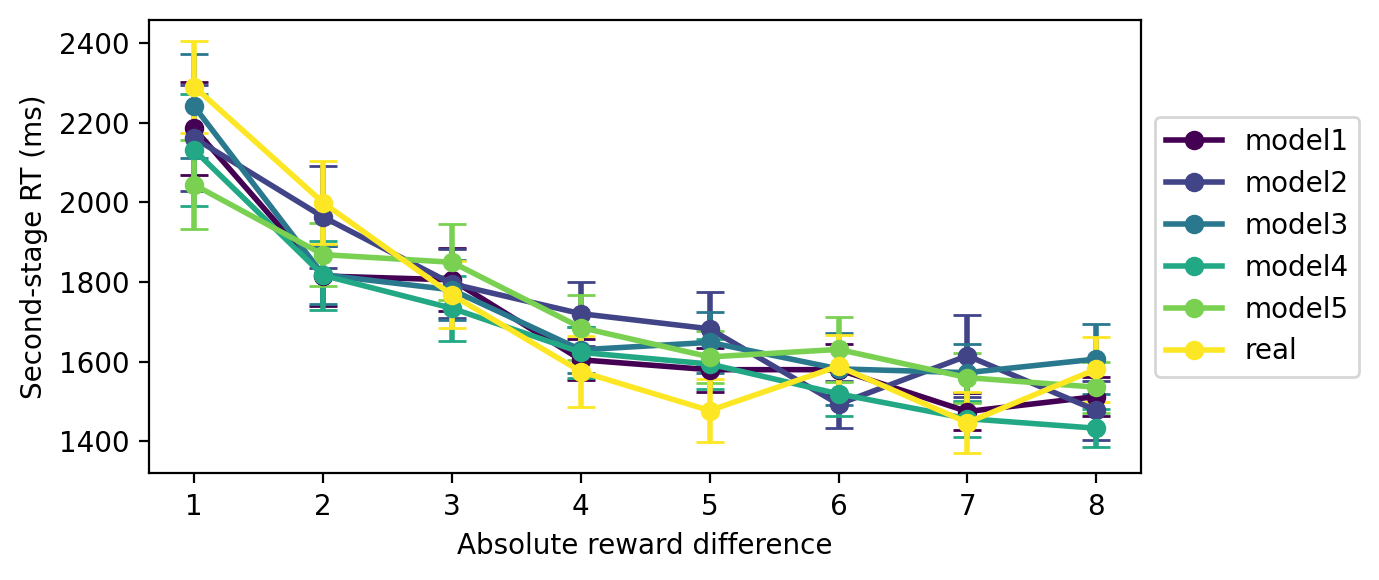

In [27]:
# 1. Mean RT for correct second-stage responses by subject × diff2
rt2 = (
    df[df['correct2']]
      .groupby(['source', 'wid', 'diff2'])['rt2']
      .mean()
      .reset_index(name='mean_rt2')
)

# 2. Group-level mean, std, count
stats = (
    rt2.groupby(['source', 'diff2'])['mean_rt2']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Colormap setup (no warning)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff2'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Second-stage RT (ms)')

# Optional: ax.set_ylim(0, 4000)

# 5. Custom color-mapped legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

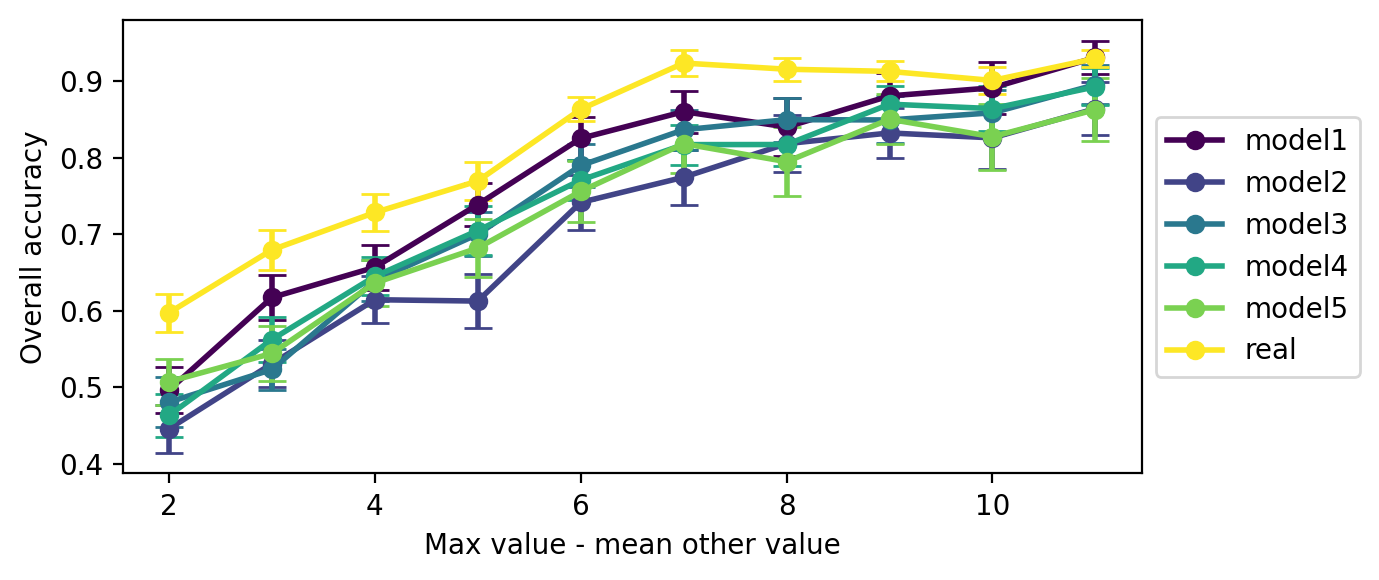

In [28]:
# 1. Compute mean accuracy per subject × diff1
per1 = (
    df.groupby(['source', 'wid', 'diff1'])['correct_all']
      .mean()
      .reset_index(name='accuracy')
)

# 2. Group-level mean, std, sem
stats = (
    per1.groupby(['source', 'diff1'])['accuracy']
         .agg(['mean', 'std', 'count'])
         .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Colormap (modern API, gradient coloring)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('Overall accuracy')

# Optional: ax.set_ylim(0, 1)

# 5. Color-mapped legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

In [29]:
def subtree_relation_code(rewards):
    # get indices of rewards sorted descending: [best, 2nd, 3rd, worst]
    idx_desc = np.argsort(rewards)[::-1]
    best, second, third, worst = idx_desc
    # define which subtree each index lives in (0 = left [0,1], 1 = right [2,3])
    subtree = lambda i: 0 if i < 2 else 1

    if subtree(best) == subtree(second):
        return 1
    elif subtree(best) == subtree(third):
        return 2
    elif subtree(best) == subtree(worst):
        return 3
    else:
        return np.nan

# Add the new column to your DataFrame
df['subtree_relation'] = df['rewards'].apply(subtree_relation_code)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,...,diff2,source,model,simulation_id,timeout,best_path_idx,correct1,correct2,correct_all,subtree_relation
0,wdf61453,"[-4, -5, 0, 3]","[-4, -1]","[0, -1, 1, 4]",2,4,2667,2400,5067,6.0,...,3.0,real,NaN,NaN,NaN,3,True,True,True,1
1,wdf61453,"[1, -1, -3, -2]","[-2, 0]","[3, 1, -3, -2]",2,4,1883,2348,4231,3.0,...,1.0,real,NaN,NaN,NaN,0,False,True,False,1
2,wdf61453,"[3, 8, -5, -4]","[4, -3]","[-1, 4, -2, -1]",1,2,1227,1736,2963,10.0,...,5.0,real,NaN,NaN,NaN,1,True,True,True,1
3,wdf61453,"[0, 2, 7, 1]","[0, 3]","[0, 2, 4, -2]",2,3,1850,1363,3213,6.0,...,6.0,real,NaN,NaN,NaN,2,True,True,True,2
4,wdf61453,"[4, 8, -7, -6]","[4, -3]","[0, 4, -4, -3]",1,2,1724,1459,3183,11.0,...,4.0,real,NaN,NaN,NaN,1,True,True,True,1


In [30]:
stats

,source,diff1,mean,std,count,sem
0,model1,2,0.496369,0.182510,37,0.030004
1,model1,3,0.617298,0.196429,45,0.029282
2,model1,4,0.656761,0.196762,45,0.029332
3,model1,5,0.738754,0.173711,37,0.028558
4,model1,6,0.825135,0.177717,39,0.028458
5,model1,7,0.860070,0.167838,37,0.027592
6,model1,8,0.839988,0.226539,35,0.038292
7,model1,9,0.880603,0.204982,45,0.030557
8,model1,10,0.891221,0.212593,40,0.033614
9,model1,11,0.930821,0.147831,45,0.022037


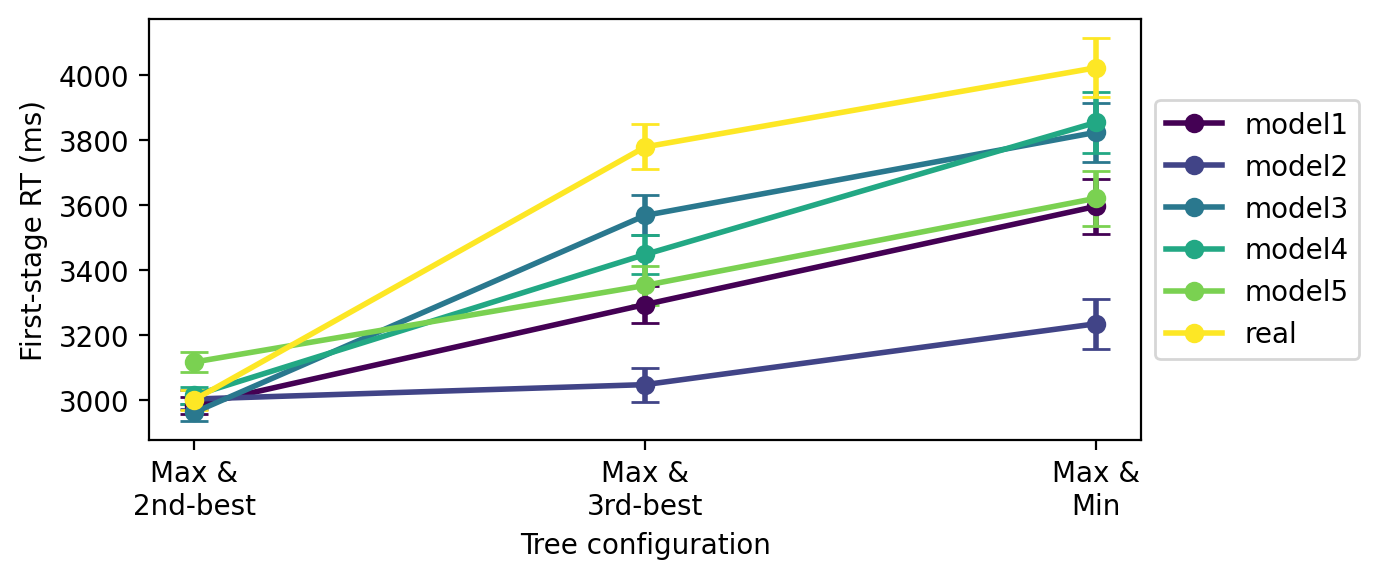

In [31]:
# 1. Compute mean and SEM of RT1 per source × subtree_relation
stats = df.groupby(['source', 'subtree_relation'])['rt1'].agg(['mean', 'sem']).reset_index()

# 2. Setup colormap
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 3. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['subtree_relation'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

# 4. Label formatting
ax.set_xlabel('Tree configuration')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Max &\n2nd-best', 'Max &\n3rd-best', 'Max &\nMin'])
ax.set_ylabel('First-stage RT (ms)')

# 5. Custom color-coded legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()
